<a href="https://colab.research.google.com/github/Shivani11032006/DA-Projects/blob/main/Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROBLEM STATEMENT:This project analyzes trip demand patterns, time trends, and location hotspots to understand customer behavior and optimize operations.

In [3]:
uber=pd.read_csv('/content/uber_trips_dataset_50k.csv')

In [4]:
uber.head()

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,status,payment_method,pickup_time,drop_time
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,Completed,Wallet,2023-01-01 00:00:00,2023-01-01 00:08:54.600000000
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,Completed,UPI,2023-01-01 00:01:00,2023-01-01 00:26:17.400000000
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,Completed,Cash,2023-01-01 00:02:00,2023-01-01 00:18:22.800000000
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,Completed,Wallet,2023-01-01 00:03:00,2023-01-01 00:22:49.800000000
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,Completed,Wallet,2023-01-01 00:04:00,2023-01-01 00:35:30.000000000


In [5]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         5945 non-null   int64  
 1   driver_id       5945 non-null   int64  
 2   rider_id        5945 non-null   int64  
 3   city            5945 non-null   object 
 4   pickup_lat      5945 non-null   float64
 5   pickup_lng      5945 non-null   float64
 6   drop_lat        5945 non-null   float64
 7   drop_lng        5945 non-null   float64
 8   distance_km     5945 non-null   float64
 9   fare_amount     5945 non-null   float64
 10  status          5945 non-null   object 
 11  payment_method  5945 non-null   object 
 12  pickup_time     5945 non-null   object 
 13  drop_time       5945 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 650.4+ KB


In [6]:
uber.describe()

,trip_id,driver_id,rider_id,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount
count,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000,5945.000000
mean,2973.000000,5482.335240,55077.699411,38.985286,-97.037143,38.985565,-97.037516,7.009082,16.031282
std,1716.318007,2580.418367,25974.154561,1.155102,14.197644,1.155166,14.197342,2.968824,6.371917
min,1.000000,1001.000000,10001.000000,37.002350,-121.999465,36.963780,-122.014720,0.010000,1.270000
25%,1487.000000,3242.000000,32498.000000,37.969275,-109.289362,37.977105,-109.286914,4.960000,11.480000
50%,2973.000000,5496.000000,55741.000000,38.997601,-96.788615,39.000015,-96.798731,7.000000,15.390000
75%,4459.000000,7708.000000,77266.000000,39.986499,-84.667422,39.983838,-84.623918,9.020000,19.980000
max,5945.000000,9997.000000,99994.000000,40.999223,-73.002322,41.032859,-72.994685,19.410000,50.670000


In [7]:
uber.columns

Index(['trip_id', 'driver_id', 'rider_id', 'city', 'pickup_lat', 'pickup_lng',
       'drop_lat', 'drop_lng', 'distance_km', 'fare_amount', 'status',
       'payment_method', 'pickup_time', 'drop_time'],
      dtype='object')

In [8]:
uber.shape

(5945, 14)

In [9]:
uber.isnull().sum()

,0
trip_id,0
driver_id,0
rider_id,0
city,0
pickup_lat,0
pickup_lng,0
drop_lat,0
drop_lng,0
distance_km,0
fare_amount,0


In [10]:
# Convert Date/Time column
uber['pickup_time'] = pd.to_datetime(uber['pickup_time'])

# Extract time features
uber['Hour'] = uber['pickup_time'].dt.hour
uber['Day'] = uber['pickup_time'].dt.day_name()
uber['Month'] = uber['pickup_time'].dt.month_name()

In [11]:
uber.columns

Index(['trip_id', 'driver_id', 'rider_id', 'city', 'pickup_lat', 'pickup_lng',
       'drop_lat', 'drop_lng', 'distance_km', 'fare_amount', 'status',
       'payment_method', 'pickup_time', 'drop_time', 'Hour', 'Day', 'Month'],
      dtype='object')

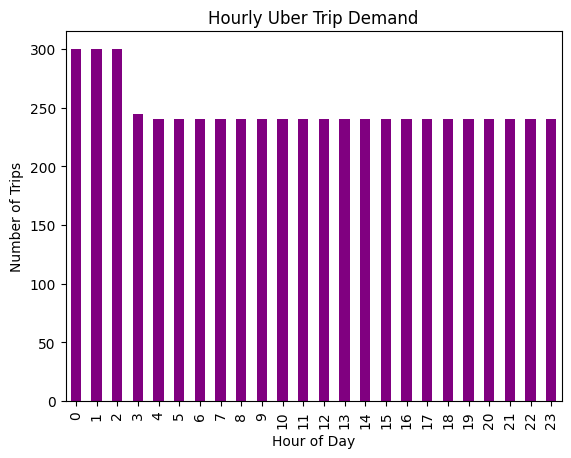

In [12]:
hourly_trips = uber['Hour'].value_counts().sort_index()
plt.figure()
hourly_trips.plot(kind='bar',color='purple')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Uber Trip Demand")
plt.show()

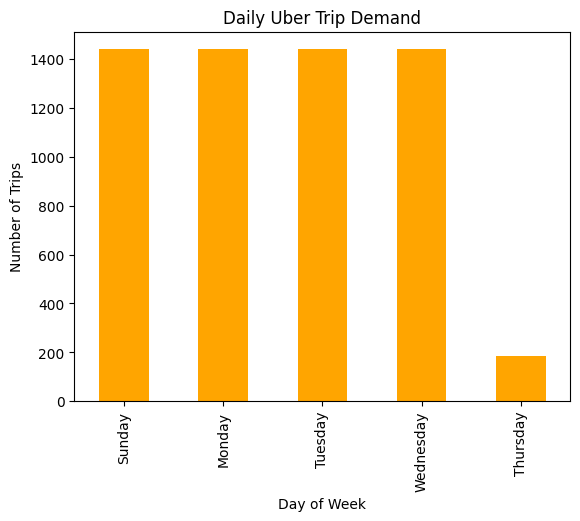

In [13]:
daily_trips = uber['Day'].value_counts()
plt.figure()
daily_trips.plot(kind='bar',color='orange')
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.title("Daily Uber Trip Demand")
plt.show()

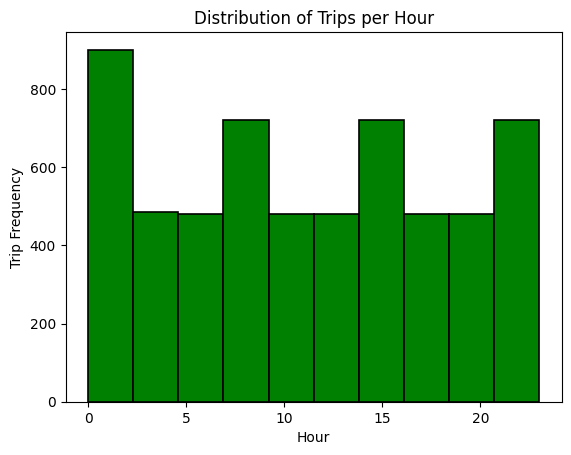

In [14]:
plt.figure()
plt.hist(uber['Hour'], edgecolor='black', linewidth=1.2,color='green')
plt.xlabel("Hour")
plt.ylabel("Trip Frequency")
plt.title("Distribution of Trips per Hour")
plt.show()

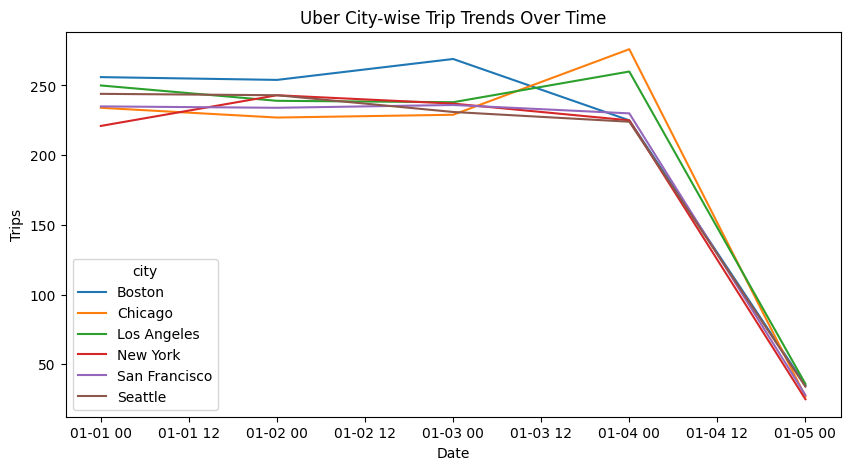

In [15]:
base_time = uber.groupby([uber['pickup_time'].dt.date, 'city']).size().unstack()
base_time.plot(figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Trips")
plt.title("Uber City-wise Trip Trends Over Time")
plt.show()

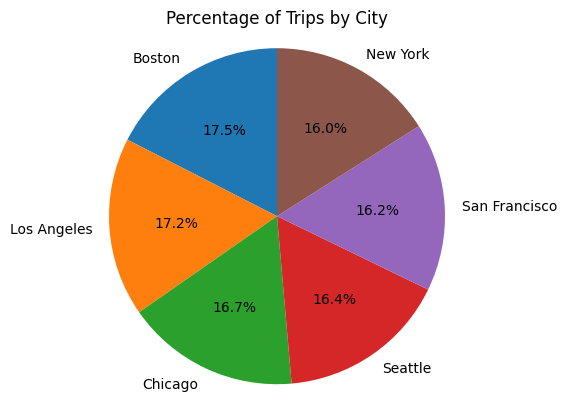

In [16]:
base_trips = uber['city'].value_counts()
plt.figure()
plt.pie(base_trips, labels=base_trips.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Trips by City")
plt.axis('equal')
plt.show()

A small number of Uber bases contribute to the majority of trips, indicating uneven workload distribution.

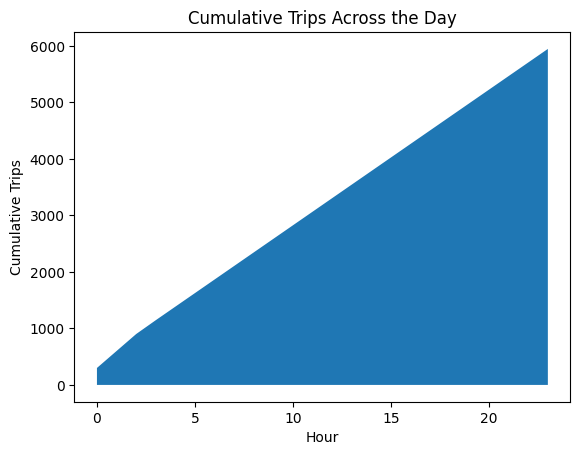

In [17]:
cum_hour = uber.groupby('Hour').size().cumsum()
plt.figure()
plt.fill_between(cum_hour.index, cum_hour.values)
plt.xlabel("Hour")
plt.ylabel("Cumulative Trips")
plt.title("Cumulative Trips Across the Day")
plt.show()

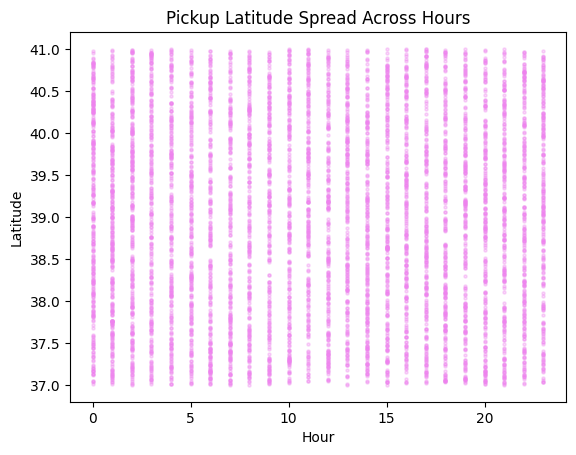

In [18]:
plt.figure()
plt.scatter(uber['Hour'], uber['pickup_lat'], s=5, alpha=0.3,color='violet')
plt.xlabel("Hour")
plt.ylabel("Latitude")
plt.title("Pickup Latitude Spread Across Hours")
plt.show()

CONCLUSION: This project analyzed Uber trip data to understand ride demand patterns, temporal trends, and location-based usage using data analytics techniques. By performing detailed exploratory data analysis, key insights were derived to support operational efficiency and decision-making.